# Learning how to understand a project management dataset and build models in Python for further analysis
Today we will be exploring a synthetically generated dataset based on the PERIL database. Learn more about the PERIL dataset and it's creator Tom Kendrick [here](http://www.failureproofprojects.com/peril.php). 

To accomplish our task of understanding the data, we will need to use some Python libraries. Python libraries can be summarized as code other people have written and shared that we can use to save us time. We can import and use that code with a small import statement. Some of the packages we will use today include [Pandas](https://towardsdatascience.com/a-quick-introduction-to-the-pandas-python-library-f1b678f34673), [Scipy](https://www.scipy.org/getting-started.html), [Numpy](https://docs.scipy.org/doc/numpy-1.15.0/user/whatisnumpy.html), and [MatPlotLib](https://matplotlib.org/). If you want to learn more about how these different packages work with examples, click [here](http://cs231n.github.io/python-numpy-tutorial/). If you would like to see the code that imports these packages - click the show code button below. 

In [34]:
#Importing python libraries which help us speed our coding up.
#The packages we're importing are below.
import pandas as pd
import random
from pandas.plotting import scatter_matrix
import scipy as sc
import numpy as np
import matplotlib
import matplotlib.pyplot as plt #Can abbreviate specific parts of the packages so it's easier to type
import sklearn as sk
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

In [4]:
#We will now read the data in and store it in a dataframe called dataset
dataset = pd.read_excel('Peril_Dataset.xlsx', header = 0)
dataset.insert(loc = 0, column = 'Project Number', value = np.arange(len(dataset)))

#### Understanding our data
Let's run some code and see how many rows and columns we have. Below - you will see the result as (Number of Rows, Number of Columns)

In [5]:
dataset.shape

(5000, 13)

#### What do the first 10 rows of our data look like? 

In [6]:
dataset.head(10)

,Project Number,Parameter,Category,Sub cat,Impact,TRL,Description,Region Numeric,Region,Project,Year,Month,Cost
0,0,Resource,Money,Limitation,18,5,Did not have sufficient resources and the cont...,0,Americas,IT/Solution,2010,October,700560
1,1,Resource,Outsourcing,Delayed start,17,4,Contractor setup delayed by a week,0,Americas,Prod. Dev.,2002,May,347922
2,2,Resource,Outsourcing,Late or poor output,13,5,Contractor did not spend time on the project b...,0,Americas,IT/Solution,2002,August,919828
3,3,Resource,Outsourcing,Late or poor output,13,7,Contractors failed to show up as committed,1,Asia,IT/Solution,2014,July,521495
4,4,Resource,Outsourcing,Late or poor output,13,3,Third-party vendor inadvertently introduced a ...,0,Americas,IT/Solution,2010,November,322010
5,5,Resource,Outsourcing,Late or poor output,16,7,Outsouced staff lacked the necessary skillset,3,Africa,IT/Solution,2014,June,498896
6,6,Resource,People,Late start,15,5,Planning delayed due to staff being still tied...,0,Americas,Prod. Dev.,2015,April,592785
7,7,Resource,People,Loss,16,4,Chef quit two days before the café was schedul...,3,Africa,IT/Solution,2017,October,578928
8,8,Resource,People,Motivation,11,5,Work at customer site had to be done by union ...,3,Africa,IT/Solution,2003,July,318846
9,9,Resource,People,Queuing,16,6,Critical task assigned to a heavily booked expert,0,Americas,IT/Solution,2010,June,1109120


#### What are our column names?
##### As you can see above - we have 12 columns with different values
Project Number: A unique number to identify each project.  
Parameter: The parameter of the project that was impacted. This dataset categorizes the risk in these three main groups of Scope, Resource, and Schedule.   
Category: The category of the risk. We have the following categories in the main parameters - Change(Scope), Defect(Scope), People(Resource), Money(Resource), Outsourcing(Resource), Delay(Schedule), Dependency(Schedule), Estimates(Schedule)  
Sub cat: The sub-category of the risk are the following - Creep, Dependency, Gap, Hardware, Software, Integration, Limitation, Late Start, Loss, Motivation, Queuing, Temp Loss, Decision, Information, Parts, Infrastructure, Legal, Project, Deadline, Judgement, and Learning 

<br>
Below is the mapping for the Parameter -> Category -> Sub category:
<br>

*  Scope -> Change -> Creep
*  Scope -> Change -> Dependency
*  Scope -> Change -> Gap  
<br>

*  Scope -> Defect -> Hardware
*  Scope -> Defect -> Software
*  Scope -> Defect -> Integration 
<br>

*  Resource -> Money -> Limitation  
<br>
*  Resource -> People -> Late Start
*  Resource -> People -> Loss
*  Resource -> People -> Motivation
*  Resource -> People -> Queuing
*  Resource -> People -> Temp Loss  
<br>
*  Schedule -> Delay -> Decision
*  Schedule -> Delay -> Hardware
*  Schedule -> Delay -> Information
*  Schedule -> Delay -> Parts  
<br>
*  Schedule -> Dependency -> Infrastructure
*  Schedule -> Dependency -> Legal
*  Schedule -> Dependency -> Project  
<br>
*  Schedule -> Estimates -> Deadline
*  Schedule -> Estimates -> Judgement
*  Schedule -> Estimates -> Learning  
<br>

Impact: The impact to the project by number of weeks.  
TRL: The technology readiness level of the project. You can find more information [here](http://acqnotes.com/acqnote/tasks/technology-readiness-level).  
Description: The description of the issue.  
Region Numeric: A numeric value representing the region (0 = Americas, 1 = Asia, 2 = Eur/ME, 3 = Africa).  
Region: What region of the world did the issue occur in.  
Project: What type of project did the issue occur in. (Prod. Dev., or IT/Solution)
Year: The year the issue occurred in.  
Cost: The cost, in USD, of the impact on the project.  
Month: The month the project failure occurred in.   

#### Now let's get a breakdown of what are the counts of the values in each column
Here we can see that there are three different types of parameters that each project is grouped into that we have: Scope, Resource, and Schedule. Below the chart are the raw counts of the projects in those parameter groups. 

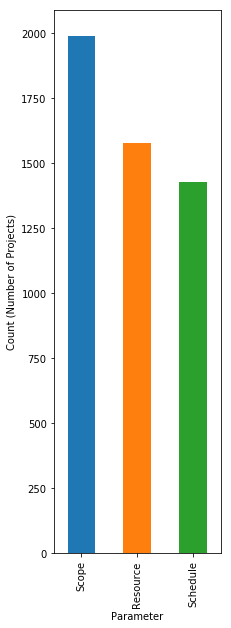

In [129]:
plt.figure(figsize = (3,10))
plot_parameter = dataset['Parameter'].value_counts().plot(kind='bar')
plot_parameter.set_xlabel("Parameter")
plot_parameter.set_ylabel("Count (Number of Projects)")
plot_parameter

In [8]:
dataset["Parameter"].value_counts()

Scope       1991
Resource    1579
Schedule    1430
Name: Parameter, dtype: int64

What is the breakdown of the different Categories that we have? We find the following categories: Change, People, Delay, Defect, Outsourcing, Estimates, Dependency, and Money. Below the chart are the raw counts of the projects in those categories. 

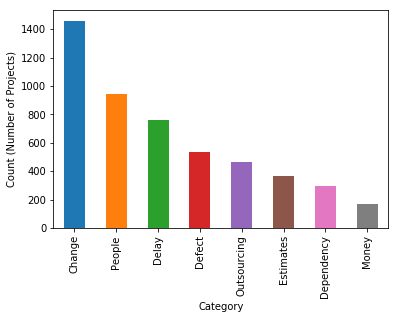

In [9]:
plot_category = dataset['Category'].value_counts().plot(kind='bar')
plot_category.set_xlabel("Category")
plot_category.set_ylabel("Count (Number of Projects)")
plot_category

In [10]:
dataset["Category"].value_counts()

Change         1459
People          943
Delay           763
Defect          532
Outsourcing     465
Estimates       369
Dependency      298
Money           171
Name: Category, dtype: int64

What is the breakdown of the sub-categories? Here we find the following: Gap, Creep, Late or poor output, Hardware, Parts, Loss, Temp loss, Queueing, Software, Learning, Limitation, Information, Judgement, Decision, Dependency, Infrastructure, Project, Late start, Delayed start, Integration, Deadline, Motivation, Legal, Project, Infrastructure, and Late or poor output. Below the chart are the raw counts of the projects in those sub-categories. 

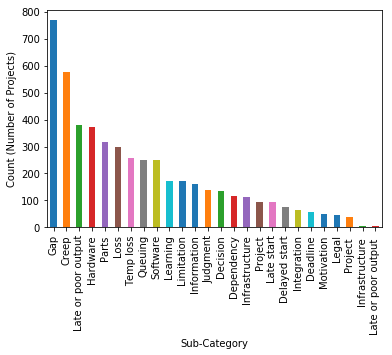

In [11]:
plot_subcat = dataset['Sub cat'].value_counts().plot(kind='bar')
plot_subcat.set_xlabel("Sub-Category")
plot_subcat.set_ylabel("Count (Number of Projects)")
plot_subcat

In [12]:
dataset["Sub cat"].value_counts()

Gap                     768
Creep                   576
Late or poor output     380
Hardware                373
Parts                   315
Loss                    298
Temp loss               256
Queuing                 250
Software                249
Learning                173
Limitation              171
Information             161
Judgment                138
Decision                134
Dependency              115
Infrastructure          113
Project                  95
Late start               93
Delayed start            76
Integration              63
Deadline                 58
Motivation               51
Legal                    46
Project                  37
Infrastructure            7
Late or poor output       4
Name: Sub cat, dtype: int64

Here you can see that the Region column has four separate regions and the count of values in those regions is provided below in the table. 

In [13]:
dataset["Region"].value_counts()

Americas    2872
Eur/ME       945
Africa       636
Asia         547
Name: Region, dtype: int64

What years do we have in our dataset? 2001-2019

In [14]:
dataset["Year"].value_counts()

2010    578
2007    435
2019    364
2015    341
2002    267
2013    235
2003    233
2005    226
2012    225
2006    223
2004    223
2018    221
2001    219
2016    212
2011    205
2009    199
2008    199
2017    198
2014    197
Name: Year, dtype: int64

What is the distribution of the Impact levels in our data? 

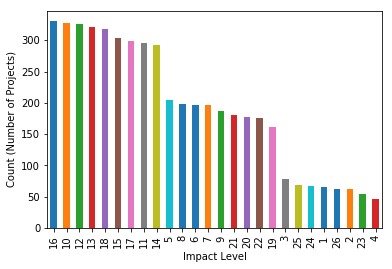

In [53]:
plot_impact = dataset['Impact'].value_counts().plot(kind='bar')
plot_impact.set_xlabel("Impact Level")
plot_impact.set_ylabel("Count (Number of Projects)")
plot_impact

## Analysis
#### Below we'll start looking at analyzing projects from different perspectives to understand which parameters, categories, sub-categories, TRL levels, regions, project types, and dates produced the highest costs and impacts. 

The Column Names and Values that can be inputted below: 

##### The Project Number
* A number between 0-4999. 

##### Parameter 
* Scope
* Resource
* Schedule

##### Category
* Change
* Defect
* Delay
* Dependency
* Estimates
* Money
* Outsourcing 
* People

##### Sub cat   
* Creep
* Dependency
* Gap
* Hardware
* Software
* Integration
* Limitation
* Late Start
* Loss
* Motivation
* Queuing
* Temp Loss
* Decision
* Information
* Parts
* Infrastructure
* Legal
* Project
* Deadline
* Judgement
* Learning 

##### Impact 
* Numbers between 1-26 in weeks

##### TRL 
* Numbers between 1-9

##### Description 

##### Region Numeric
* 0: Americas
* 1: Asia
* 2: Eur/ME
* 3: Africa

##### Region 
* Americas
* Asia
* Eur/ME
* Africa

##### Project 
* IT/Solution
* Prod. Dev.

##### Year 
* Years from 2001-2019

##### Cost 
* Number between 10787 and 2543242

##### Month 
* Any month in the calendar year (January - December)

__What is the cost distribution in our data? We find that we have a median between "500,000"  and  "1,000,000" and the cost values are skewed to the left.__

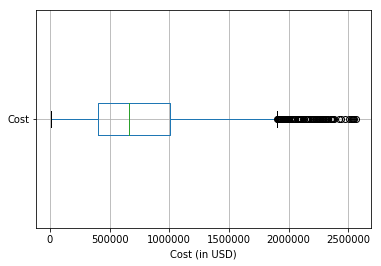

In [15]:
boxplot = dataset.boxplot(column=['Cost'], vert = False)
boxplot.set_xlabel("Cost (in USD)")
boxplot

If we want to understand which projects contribute to the outliers, let's filter the data to projects where the cost was greater than $2,000,000. Let's also sort the data so we can see the projects with the highest cost failures first. 

In [77]:
dataset_high_cost = dataset[dataset['Cost']>2000000]
dataset_high_cost = dataset_high_cost.sort_values(['Cost'], ascending = False)
dataset_high_cost

,Project Number,Parameter,Category,Sub cat,Impact,TRL,Description,Region Numeric,Region,Project,Year,Month,Cost
3842,3842,Resource,People,Late start,26,3,Change Management Lead took unexpected medical...,1,Asia,IT/Solution,2003,November,2562560
4940,4940,Scope,Change,Gap,26,8,Chip failed and had to be refabricated with ch...,2,Eur/ME,IT/Solution,2018,January,2548442
3705,3705,Resource,Outsourcing,Delayed start,26,2,Project had to wait until all data collection ...,2,Eur/ME,Prod. Dev.,2001,October,2543034
4956,4956,Scope,Change,Gap,26,6,The scope of the project was poorly defined,0,Americas,IT/Solution,2010,September,2535416
4938,4938,Scope,Change,Gap,26,3,Ship sinks with critical part; forced to repla...,0,Americas,Prod. Dev.,2010,February,2533232
4077,4077,Schedule,Dependency,Project,26,5,"Client's insisted on the use of ""the latest te...",0,Americas,IT/Solution,2010,May,2526342
4991,4991,Resource,People,Loss,26,2,"To expand business, unrealistic commitments we...",3,Africa,Prod. Dev.,2004,May,2504268
4788,4788,Resource,People,Loss,25,2,Contract lab failed to inform us that they had...,3,Africa,Prod. Dev.,2002,December,2469325
4549,4549,Resource,Money,Limitation,26,4,"""Minor"" changes added and accepted late in pr...",0,Americas,IT/Solution,2002,January,2437292
4552,4552,Resource,Money,Limitation,26,7,Server technology chage was necessitated to su...,2,Eur/ME,Prod. Dev.,2015,December,2425748


We find 72 rows where the cost value is greater than $2,000,000. Let's plot the parameters, categories, and sub-categories off these project failures to get a better sense of what types of projects comprise these high cost failures. 

Text(0.5,1,'The Count of High Cost Project Failures by Parameter')

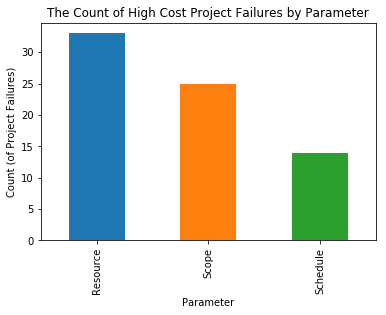

In [59]:
plot_high_cost = dataset_high_cost['Parameter'].value_counts().plot(kind='bar')
plt.xlabel('Parameter')
plt.ylabel('Count (of Project Failures)')
plt.title('The Count of High Cost Project Failures by Parameter')

Text(0.5,1,'The Count of High Cost Project Failures by Category')

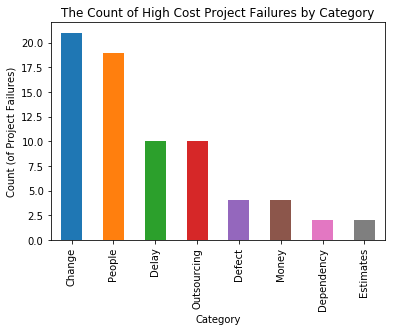

In [60]:
plot_high_cost_by_category = dataset_high_cost['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count (of Project Failures)')
plt.title('The Count of High Cost Project Failures by Category')

Text(0.5,1,'The Count of High Cost Project Failures by Sub-Category')

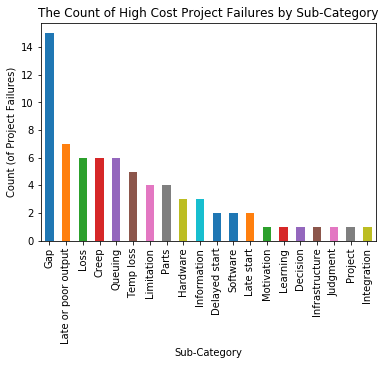

In [61]:
plot_high_cost_by_subcat = dataset_high_cost['Sub cat'].value_counts().plot(kind='bar')
plt.xlabel('Sub-Category')
plt.ylabel('Count (of Project Failures)')
plt.title('The Count of High Cost Project Failures by Sub-Category')

Let's plot these high cost project failures to see which one has the most. 

Text(0.5,1,'The Count of High Cost Project Failures by Region')

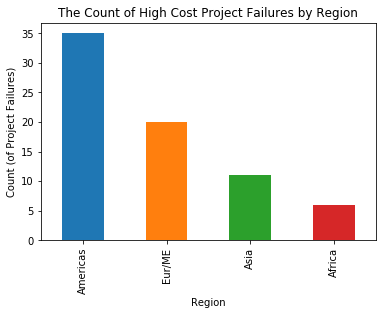

In [62]:
plot_high_cost_by_region = dataset_high_cost['Region'].value_counts().plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Count (of Project Failures)')
plt.title('The Count of High Cost Project Failures by Region')

__Let's say we want to look at the data for the projects in the Americas region - we can run the following code. Let's also sort the data so we can see the projects with the highest cost failures first. If you want to see the data for a difference region then change 'Americas' to a different region (copy and paste the region name from above). For example you can copy and paste the line below to see the data for just the Europe/Middle East region:__


Copy and paste the code below: <br>
region_filter = dataset.loc[dataset['Region'] == 'Eur/ME'] <br>
region_filter = region_filter.sort_values(['Cost'], ascending = False) <br>
region_filter.head(50) 

In [78]:
region_filter = dataset.loc[dataset['Region'] == 'Americas']
region_filter = region_filter.sort_values(['Cost'], ascending = False)
region_filter.head(50) #Let's look at the first 50 values

,Project Number,Parameter,Category,Sub cat,Impact,TRL,Description,Region Numeric,Region,Project,Year,Month,Cost
4956,4956,Scope,Change,Gap,26,6,The scope of the project was poorly defined,0,Americas,IT/Solution,2010,September,2535416
4938,4938,Scope,Change,Gap,26,3,Ship sinks with critical part; forced to repla...,0,Americas,Prod. Dev.,2010,February,2533232
4077,4077,Schedule,Dependency,Project,26,5,"Client's insisted on the use of ""the latest te...",0,Americas,IT/Solution,2010,May,2526342
4549,4549,Resource,Money,Limitation,26,4,"""Minor"" changes added and accepted late in pr...",0,Americas,IT/Solution,2002,January,2437292
4133,4133,Resource,Money,Limitation,24,6,Shipping documents not filled in correctly,0,Americas,IT/Solution,2006,March,2383512
4116,4116,Scope,Change,Gap,25,6,Key contributor out ill at critical time.,0,Americas,IT/Solution,2019,December,2371375
3580,3580,Schedule,Delay,Parts,24,2,Team leader reassigned to another project and ...,0,Americas,IT/Solution,2014,November,2366784
4925,4925,Scope,Change,Creep,25,2,Outsourcing partner in Switzerland did unneede...,0,Americas,Prod. Dev.,2010,November,2360300
4251,4251,Resource,Outsourcing,Late or poor output,26,2,"Late in project, the budget and staff are cut ...",0,Americas,Prod. Dev.,2017,March,2350920
3730,3730,Resource,People,Queuing,24,6,Planning delayed due to staff being still tied...,0,Americas,Prod. Dev.,2015,August,2324688


__What if we want to see the data for projects in the Americas that had a category of money? Let's also sort the data so we can see the projects with the highest cost failures first. See below for the code to do so, you can change the category that you would like by copying and pasting the category you want from above into the code below.__

For example, if I want to look at the project in the Americas where the category is People then I could do: <br>
category_filter = category_filter.sort_values(['Cost'], ascending = False) <br>
dataset.loc[(dataset['Category'] == 'People') & (dataset['Region'] == 'Americas')]

In [73]:
category_filter = dataset.loc[(dataset['Category'] == 'Money') & (dataset['Region'] == 'Americas')]
category_filter = category_filter.sort_values(['Cost'], ascending = False)
category_filter.head(50) #Let's look at the first 50 rows where the region is the Americas and the category is Money


,Project Number,Parameter,Category,Sub cat,Impact,TRL,Description,Region Numeric,Region,Project,Year,Month,Cost
4549,4549,Resource,Money,Limitation,26,4,"""Minor"" changes added and accepted late in pr...",0,Americas,IT/Solution,2002,January,2437292
4133,4133,Resource,Money,Limitation,24,6,Shipping documents not filled in correctly,0,Americas,IT/Solution,2006,March,2383512
4082,4082,Resource,Money,Limitation,24,1,Components that could have been purchased were...,0,Americas,IT/Solution,2017,December,1864824
4434,4434,Resource,Money,Limitation,26,6,Key analyst is scheduled to work on another pr...,0,Americas,Prod. Dev.,2015,November,1809678
4546,4546,Resource,Money,Limitation,22,5,Project schedule was revised user interface re...,0,Americas,Prod. Dev.,2010,July,1724844
4435,4435,Resource,Money,Limitation,19,6,Architect who knew how to integrate all compon...,0,Americas,Prod. Dev.,2010,February,1678745
1077,1077,Resource,Money,Limitation,21,6,Sponsor fails to provide money,0,Americas,Prod. Dev.,2007,November,1646505
1132,1132,Resource,Money,Limitation,22,3,IT department was underfunded and had insuffie...,0,Americas,IT/Solution,2019,January,1594516
4072,4072,Resource,Money,Limitation,26,9,Delay in getting material when a fermentation ...,0,Americas,IT/Solution,2014,February,1552278
1480,1480,Resource,Money,Limitation,21,6,Internal resources were not available on a ful...,0,Americas,IT/Solution,2007,December,1486023


__How can we visualize this filtered data to understand how TRL level effects the Impact value in projects in the Americas, in the Money Category?__ 

In [79]:
g = category_filter.groupby('TRL', as_index = False)['Impact'].mean()
g['Impact'] = g['Impact'].round(2)
g

,TRL,Impact
0,1,14.75
1,2,13.50
2,3,12.45
3,4,14.17
4,5,14.71
5,6,15.54
6,7,11.78
7,8,10.75
8,9,22.00


<BarContainer object of 9 artists>

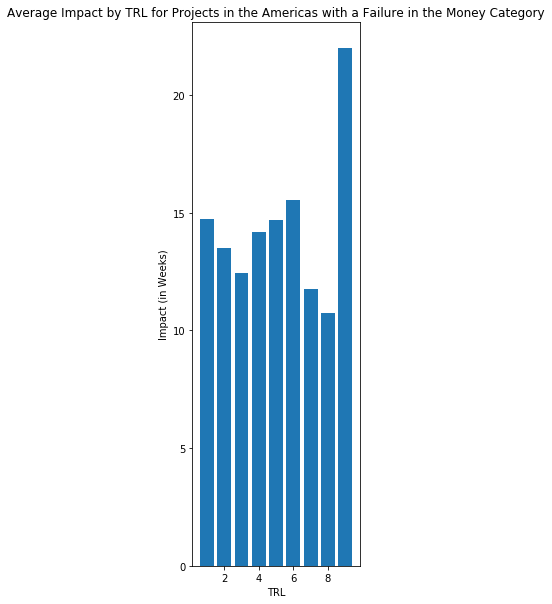

In [128]:
plt.figure(figsize = (3,10))
h = plt.bar(g['TRL'],g['Impact'])
plt.xlabel('TRL')
plt.ylabel('Impact (in Weeks)')
plt.title('Average Impact by TRL for Projects in the Americas with a Failure in the Money Category')
h

__Now that we can we graph this data easily and analyze the data for our understanding? Let's start with understanding how the average cost per failure varies by region.__

In [125]:
y = dataset.groupby('Region', as_index = False)['Cost'].mean()
y['Cost'] = y['Cost'].round(2)
y

,Region,Cost
0,Africa,744616.68
1,Americas,752808.41
2,Asia,724886.88
3,Eur/ME,778307.72


<BarContainer object of 4 artists>

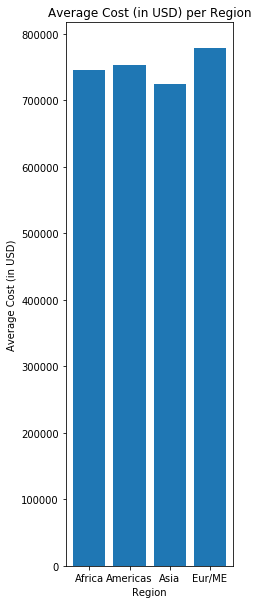

In [126]:
plt.figure(figsize = (3,10))
a = plt.bar(y['Region'],y['Cost'])
plt.xlabel('Region')
plt.ylabel('Average Cost (in USD)')
plt.title('Average Cost (in USD) per Region')
a

__What is the Average Cost Per Year for all the Projects?__

In [23]:
z = dataset.groupby('Year', as_index = False)['Cost'].mean()
z['Cost'] = z['Cost'].round(2)
z.sort_values(by = ['Year'])
z

,Year,Cost
0,2001,766136.24
1,2002,775338.76
2,2003,751868.87
3,2004,760491.31
4,2005,714075.49
5,2006,715143.45
6,2007,711551.25
7,2008,729581.87
8,2009,782631.19
9,2010,801956.27


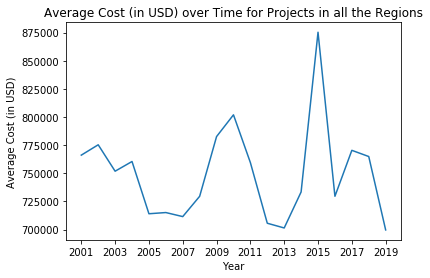

In [39]:
b = plt.plot(z['Year'],z['Cost'])
plt.xlabel('Year')
plt.ylabel('Average Cost (in USD)')
plt.title('Average Cost (in USD) over Time for Projects in all the Regions')
plt.xticks(np.arange(2001, 2020, 2)) 
b

In [40]:
y = region_filter.groupby('Year', as_index = False)['Cost'].mean()
y['Cost'] = y['Cost'].round(2)
y = y.sort_values(by = ['Year'])
y

,Year,Cost
0,2001,753027.31
1,2002,759695.25
2,2003,730311.18
3,2004,734516.43
4,2005,694079.68
5,2006,704339.55
6,2007,697654.34
7,2008,724117.90
8,2009,800630.01
9,2010,841943.56


__Now let's look at the Average Cost Per Year for Projects in the Americas.__

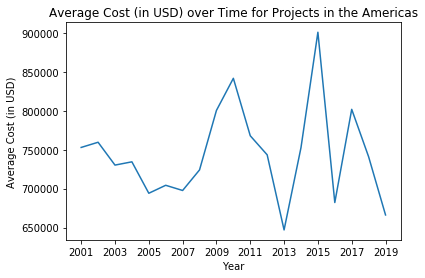

In [26]:
a = plt.plot(y['Year'],y['Cost'])
plt.xlabel('Year')
plt.ylabel('Average Cost (in USD)')
plt.title('Average Cost (in USD) over Time for Projects in the Americas')
plt.xticks(np.arange(2001, 2020, 2)) 
a

__Let's take this one step further - what if we look at the average cost for projects in all the regions but the Americas? First we'll filter the data to only include projects in the Asia, Eur/ME, and Africa regions. Let's also sort the data so we can see the projects with the highest cost failures first.__

In [81]:
region_filter_no_americas = dataset.loc[dataset['Region'] != 'Americas']
region_filter_no_americas = region_filter_no_americas.sort_values(['Cost'], ascending = False)
region_filter_no_americas.head(50) #Let's look at the first 50 values

,Project Number,Parameter,Category,Sub cat,Impact,TRL,Description,Region Numeric,Region,Project,Year,Month,Cost
3842,3842,Resource,People,Late start,26,3,Change Management Lead took unexpected medical...,1,Asia,IT/Solution,2003,November,2562560
4940,4940,Scope,Change,Gap,26,8,Chip failed and had to be refabricated with ch...,2,Eur/ME,IT/Solution,2018,January,2548442
3705,3705,Resource,Outsourcing,Delayed start,26,2,Project had to wait until all data collection ...,2,Eur/ME,Prod. Dev.,2001,October,2543034
4991,4991,Resource,People,Loss,26,2,"To expand business, unrealistic commitments we...",3,Africa,Prod. Dev.,2004,May,2504268
4788,4788,Resource,People,Loss,25,2,Contract lab failed to inform us that they had...,3,Africa,Prod. Dev.,2002,December,2469325
4552,4552,Resource,Money,Limitation,26,7,Server technology chage was necessitated to su...,2,Eur/ME,Prod. Dev.,2015,December,2425748
3394,3394,Schedule,Dependency,Infrastructure,26,6,Need to upgrade detected only at project end,2,Eur/ME,Prod. Dev.,2003,March,2357602
4843,4843,Resource,Outsourcing,Late start,25,4,Internal supplier problem; needed components d...,3,Africa,Prod. Dev.,2013,June,2326750
4797,4797,Scope,Change,Creep,24,7,Late test results came back negative,3,Africa,IT/Solution,2011,January,2309472
3523,3523,Scope,Change,Gap,24,8,Several employees had to take a leave of absen...,1,Asia,Prod. Dev.,2011,August,2301120


In [42]:
c = region_filter_no_americas.groupby('Year', as_index = False)['Cost'].mean()
c['Cost'] = c['Cost'].round(2)
c = c.sort_values(by = ['Year'])
c

,Year,Cost
0,2001,779125.99
1,2002,795394.55
2,2003,774372.07
3,2004,784885.11
4,2005,733375.79
5,2006,727068.51
6,2007,744882.14
7,2008,734674.51
8,2009,757989.94
9,2010,730288.23


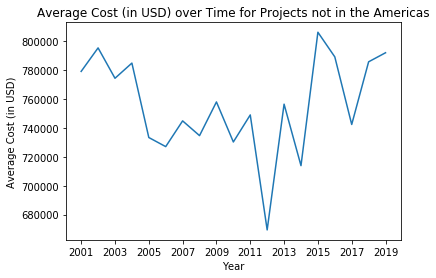

In [43]:
l = plt.plot(c['Year'],c['Cost'])
plt.xlabel('Year')
plt.ylabel('Average Cost (in USD)')
plt.title('Average Cost (in USD) over Time for Projects not in the Americas')
plt.xticks(np.arange(2001, 2020, 2)) 
l

__Now that we've looked at the cost breakdown over time per region - let's look at the difference in the average Impact (in weeks) per region.__

In [30]:
d = dataset.groupby('Region', as_index = False)['Impact'].mean()
d['Impact'] = d['Impact'].round(2)
d

,Region,Impact
0,Africa,13.53
1,Americas,13.51
2,Asia,13.29
3,Eur/ME,13.41


__Let's also take a look at how TRL values affect Impact.__ 

In [31]:
e = dataset.groupby('TRL', as_index = False)['Impact'].mean()
e['Impact'] = e['Impact'].round(2)
e

,TRL,Impact
0,1,13.70
1,2,13.13
2,3,13.45
3,4,13.37
4,5,13.76
5,6,13.83
6,7,13.43
7,8,12.82
8,9,12.29


<BarContainer object of 9 artists>

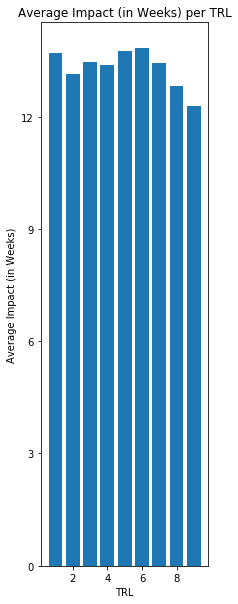

In [127]:
plt.figure(figsize = (3,10))
f = plt.bar(e['TRL'],e['Impact'])
plt.xlabel('TRL')
plt.ylabel('Average Impact (in Weeks)')
plt.title('Average Impact (in Weeks) per TRL')
plt.yticks(np.arange(0, 13, 3)) 
f